# Overview of the Adult Immune cell atlas

In here I will highlight the different compartments of the Developmental Immune cell atlas, for visualisation purposes only, as the DEG analyses are done in each specific compartment (HSC progenitors, Myeloid, Lymphoid and Erythro-Megakaryocytes). I will subset the dataset as in the compartment notebooks, therefore removing cell types reported as cycling, doublets or low quality.

In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.sparse
import anndata
import seaborn as sns
#import scvelo as scv

#import milopy.core as milo
#import milopy.plot as milopl


In [2]:
sc.set_figure_params(dpi=150, dpi_save=300, transparent=False) # Makes it more visible

In [3]:
#tmpfile = '../h5ad_files/Bcells_lineage_wilcox_tmp.h5ad'

In [6]:
alpha_dir = "/home/irepan/Desktop/Github/Immune_Adaptation_Atlas_2023/results/adult_tissues/"
alpha_vals = pd.read_csv(alpha_dir + "abcmk_inference_alpha_top_500_orthologs.txt", sep="\t")

In [7]:
alpha_vals

,cell,line,type,α_weak,α_strong,α,γ₋,β,γ₊,γ₊₊,B,n,pvalue,pvalue_strong,pvalue_weak,color
0,T_CD4_CD8,Tcells,case,0.076085,0.259779,0.480838,537.382005,0.312226,9.118081,1563.953056,0.729241,28,1.000000,1.000000,1.000000,#8BBADBFF
1,Trm_em_CD8,Tcells,case,0.104454,0.227545,0.449948,1086.914532,0.310948,8.849573,1656.253210,0.629850,84,0.042957,0.022977,0.088911,#315E8BFF
2,Pre-B,Bcells,case,0.075390,0.180741,0.410802,730.406161,0.268686,6.613066,1472.327334,0.399066,154,0.095904,0.093906,0.479520,#29783EFF
3,Trm_Th1_Th17,Tcells,case,0.189431,0.159361,0.409699,1093.108525,0.212957,2.160628,503.910434,0.428947,211,0.043956,0.095904,0.002997,#396694FF
4,DC1,Myeloid,case,0.040626,0.296073,0.360286,736.744521,0.243348,7.413497,1610.497971,0.336004,500,0.010995,0.001499,0.652174,#BB85A9FF
5,GC_B_II,Bcells,case,0.101001,0.150050,0.353739,756.290440,0.254198,5.732977,776.909658,0.600436,349,0.079920,0.091908,0.225774,#94D484FF
6,NK_CD56bright_CD16-,Tcells,case,0.185912,0.117828,0.341419,1746.053438,0.226319,1.450086,1157.711078,0.878211,500,0.018981,0.110889,0.002997,#96C3E1FF
7,MAIT,Tcells,case,0.114616,0.122997,0.334064,723.712131,0.185604,1.822467,1213.097962,0.479159,149,0.134865,0.208791,0.096903,#ADD5ECFF
8,Classical_monocytes,Myeloid,case,0.135369,0.116112,0.306234,1161.474086,0.225760,1.986203,570.033585,0.436882,424,0.105947,0.268366,0.013993,#E4B6D6FF
9,DC2,Myeloid,case,0.036466,0.219808,0.305341,973.514392,0.235107,5.900347,1615.865580,0.350114,500,0.074963,0.014493,0.732634,#C995B7FF


In [9]:
adata = sc.read_h5ad('/mnt/storage/Github/Immune_Adaptation_Atlas/adult_tissues/h5ad_files/global.h5ad')
adata

AnnData object with n_obs × n_vars = 329762 × 36601
    obs: 'Organ', 'Donor', 'Chemistry', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype'
    obsm: 'X_umap'

In [10]:
adata.obs["celltype"] = adata.obs["Manually_curated_celltype"].str.replace(r"[/ &]","_").astype('category')
adata.obs["celltype"] = adata.obs["celltype"].str.replace(r"[()]","").astype('category')

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


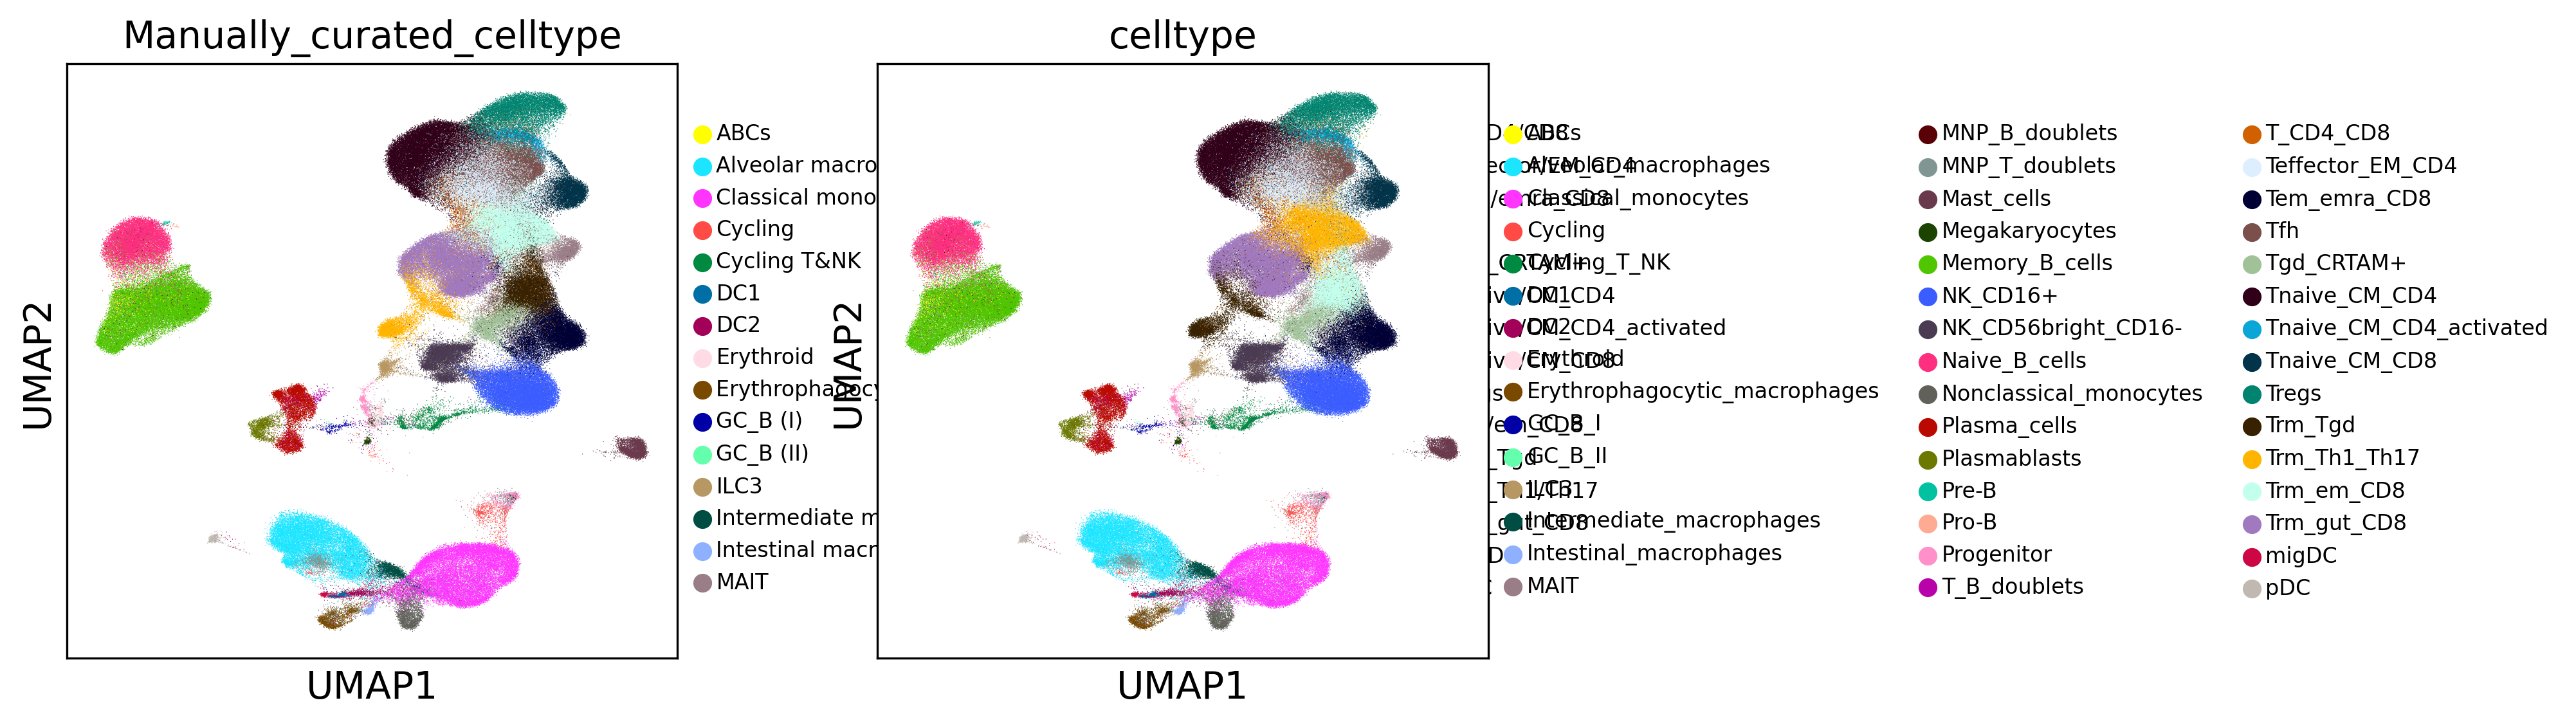

In [11]:
sc.pl.umap(adata, color=["Manually_curated_celltype","celltype"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

In [12]:
adata.obs["celltype"].cat.categories

Index(['ABCs', 'Alveolar_macrophages', 'Classical_monocytes', 'Cycling',
       'Cycling_T_NK', 'DC1', 'DC2', 'Erythroid',
       'Erythrophagocytic_macrophages', 'GC_B_I', 'GC_B_II', 'ILC3',
       'Intermediate_macrophages', 'Intestinal_macrophages', 'MAIT',
       'MNP_B_doublets', 'MNP_T_doublets', 'Mast_cells', 'Megakaryocytes',
       'Memory_B_cells', 'NK_CD16+', 'NK_CD56bright_CD16-', 'Naive_B_cells',
       'Nonclassical_monocytes', 'Plasma_cells', 'Plasmablasts', 'Pre-B',
       'Pro-B', 'Progenitor', 'T_B_doublets', 'T_CD4_CD8', 'Teffector_EM_CD4',
       'Tem_emra_CD8', 'Tfh', 'Tgd_CRTAM+', 'Tnaive_CM_CD4',
       'Tnaive_CM_CD4_activated', 'Tnaive_CM_CD8', 'Tregs', 'Trm_Tgd',
       'Trm_Th1_Th17', 'Trm_em_CD8', 'Trm_gut_CD8', 'migDC', 'pDC'],
      dtype='object')

In [13]:
adata_subset = adata[adata.obs['Manually_curated_celltype'].isin([
    ## Bcells
    'ABCs', 'GC_B (I)', 'GC_B (II)', 
    'Memory B cells', 'Naive B cells',
    'Plasma cells', 'Plasmablasts',
    'Pre-B', 'Pro-B',
    ## Tcells
    'ILC3', 'MAIT', 'NK_CD16+', 'NK_CD56bright_CD16-',
    'T_CD4/CD8', 'Teffector/EM_CD4', 'Tem/emra_CD8',
     'Tfh', 'Tgd_CRTAM+','Tnaive/CM_CD4', 
     'Tnaive/CM_CD4_activated', 'Tnaive/CM_CD8', 
     'Tregs','Trm/em_CD8', 'Trm_Tgd', 'Trm_Th1/Th17',
     'Trm_gut_CD8',
    ## Myeloid
    'Alveolar macrophages', 
    'Classical monocytes',# 'Cycling',
    'DC1', 'DC2',
    'Erythrophagocytic macrophages',
    'Intermediate macrophages',
    'Intestinal macrophages',# 'MNP/T doublets',
    'Nonclassical monocytes',
    'migDC'
])]

In [14]:
adata_subset

View of AnnData object with n_obs × n_vars = 315481 × 36601
    obs: 'Organ', 'Donor', 'Chemistry', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'Manually_curated_celltype', 'celltype'
    uns: 'Manually_curated_celltype_colors', 'celltype_colors'
    obsm: 'X_umap'

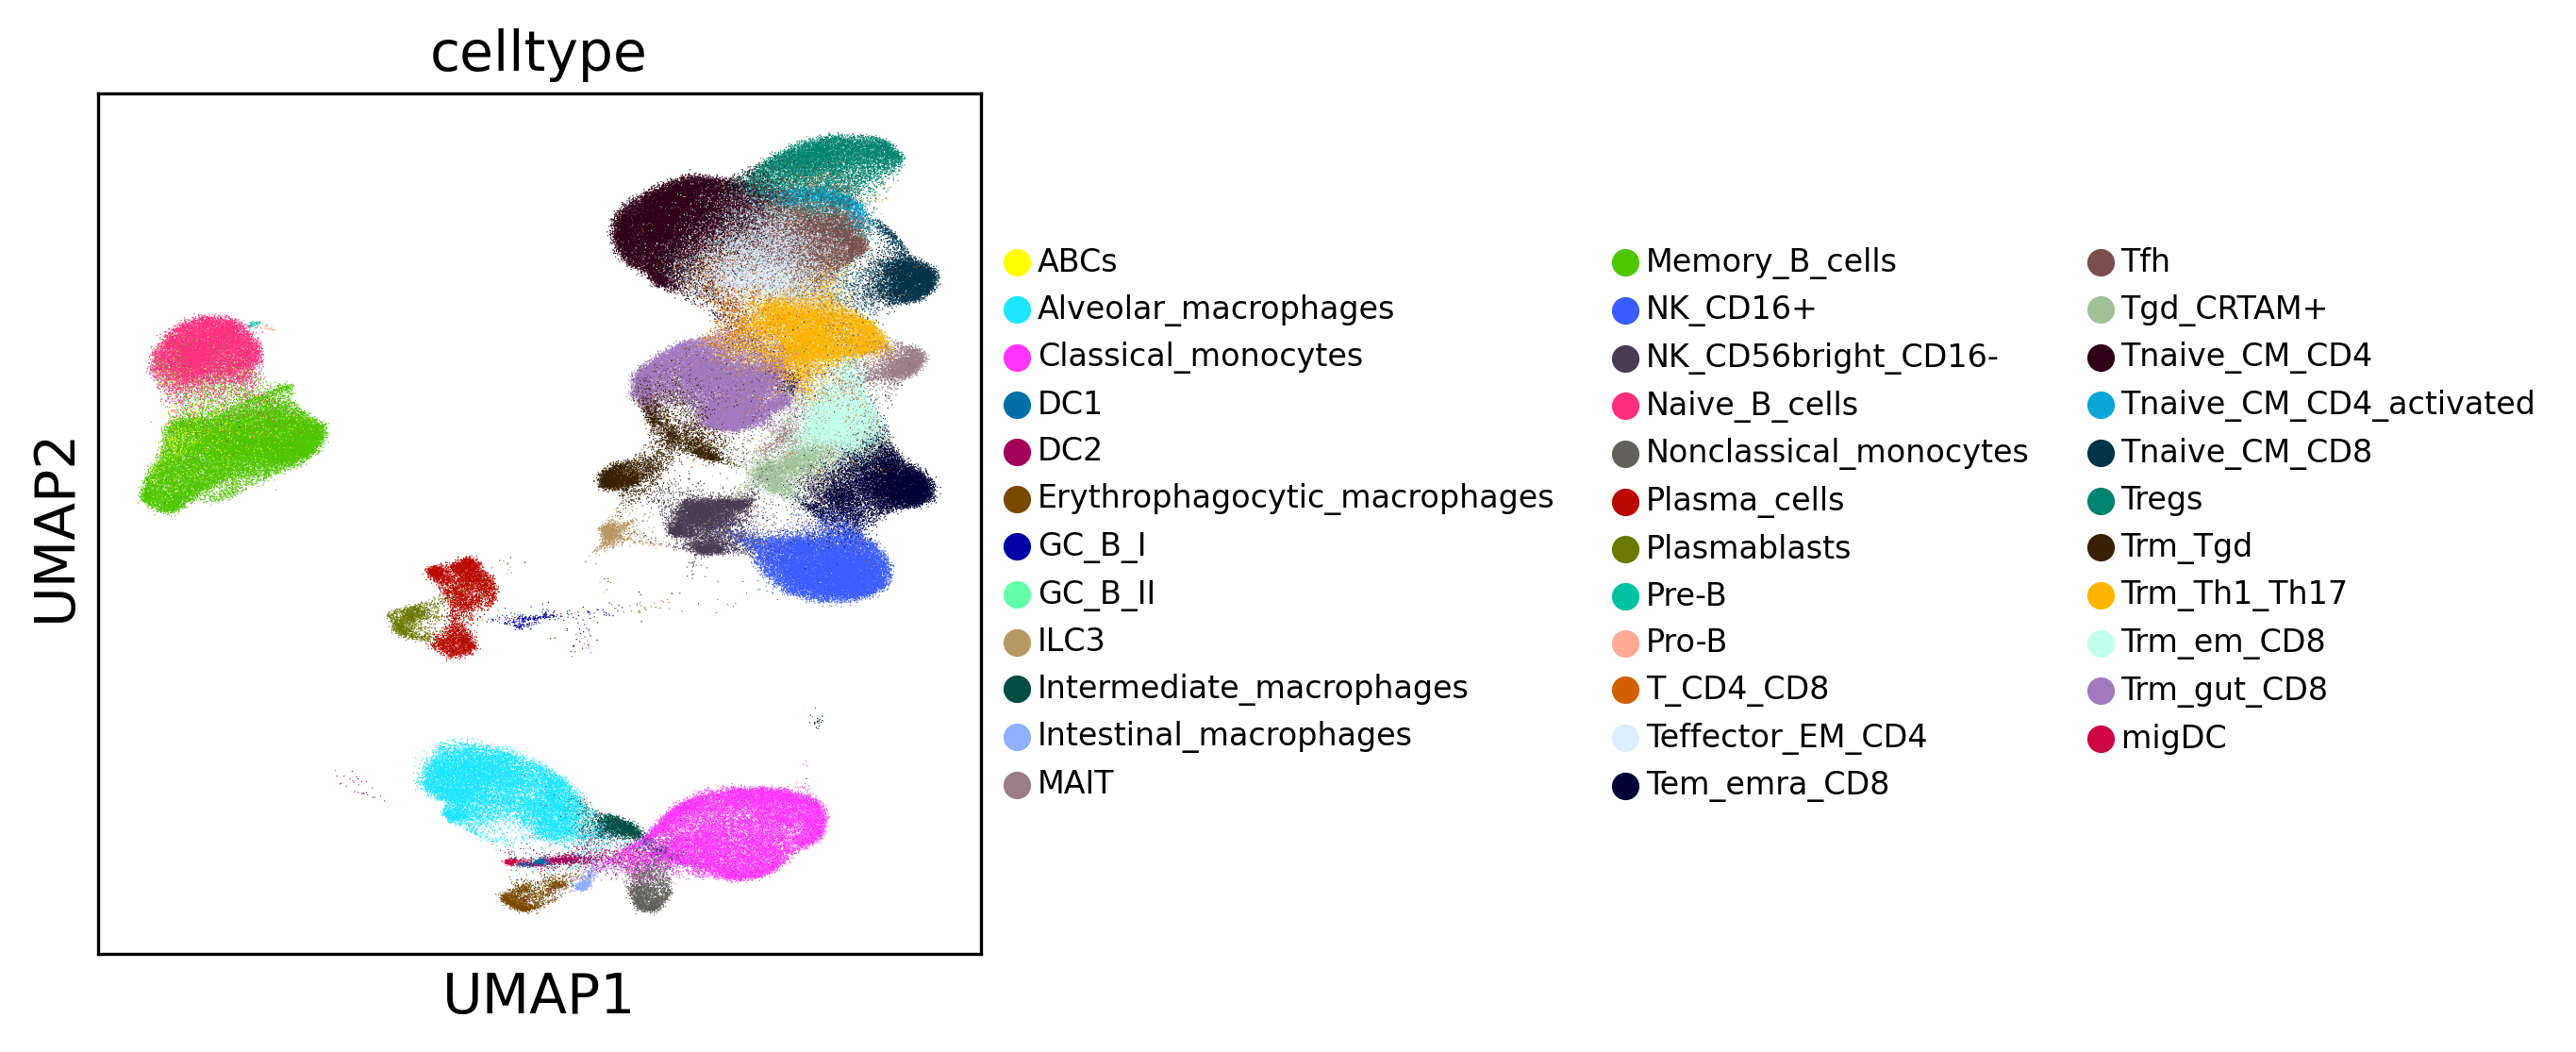

In [15]:
sc.pl.umap(adata_subset, color=["celltype"],#save= "Lymphoid.png",
           legend_fontoutline=1, legend_fontsize=8)

In [16]:
adata = adata_subset
del(adata_subset)

## Main compartment annotation

In [21]:
anno_lineage = {
    ## Bcells
    'ABCs': "Bcells",
    'GC_B (I)': "Bcells",
    'GC_B (II)': "Bcells",
    'Memory B cells': "Bcells",
    'Naive B cells': "Bcells",
    'Plasma cells': "Bcells",
    'Plasmablasts': "Bcells",
    'Pre-B': "Bcells",
    'Pro-B': "Bcells",
    ## Tcells
    'ILC3': "Tcells",
    'MAIT': "Tcells",
    'NK_CD16+': "Tcells",
    'NK_CD56bright_CD16-': "Tcells",
    'T_CD4/CD8': "Tcells",
    'Teffector/EM_CD4': "Tcells",
    'Tem/emra_CD8': "Tcells",
    'Tfh': "Tcells",
    'Tgd_CRTAM+': "Tcells",
    'Tnaive/CM_CD4': "Tcells",
    'Tnaive/CM_CD4_activated': "Tcells",
    'Tnaive/CM_CD8': "Tcells",
    'Tregs': "Tcells",
    'Trm/em_CD8': "Tcells",
    'Trm_Tgd': "Tcells",
    'Trm_Th1/Th17': "Tcells",
    'Trm_gut_CD8': "Tcells",
    ## Myeloid
    'Alveolar macrophages': "Myeloid", 
    'Classical monocytes': "Myeloid",
    'DC1': "Myeloid",
    'DC2': "Myeloid",
    'Erythrophagocytic macrophages': "Myeloid",
    'Intermediate macrophages': "Myeloid",
    'Intestinal macrophages': "Myeloid",
    'Nonclassical monocytes': "Myeloid",
    'migDC': "Myeloid"
}

In [22]:
adata.obs['Lineage_anno'] = adata.obs['Manually_curated_celltype']
adata.obs['Lineage_anno'] = (
    adata.obs["Manually_curated_celltype"]
    .map(anno_lineage)
.astype('category')
)

In [23]:
adata.obs["alpha"] = float('NaN')
for i in alpha_vals["cell"]:
    #print(i)
    adata.obs["alpha"][adata.obs["celltype"] == i] = float(alpha_vals["α"][alpha_vals["cell"] == i])

/home/irepan/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


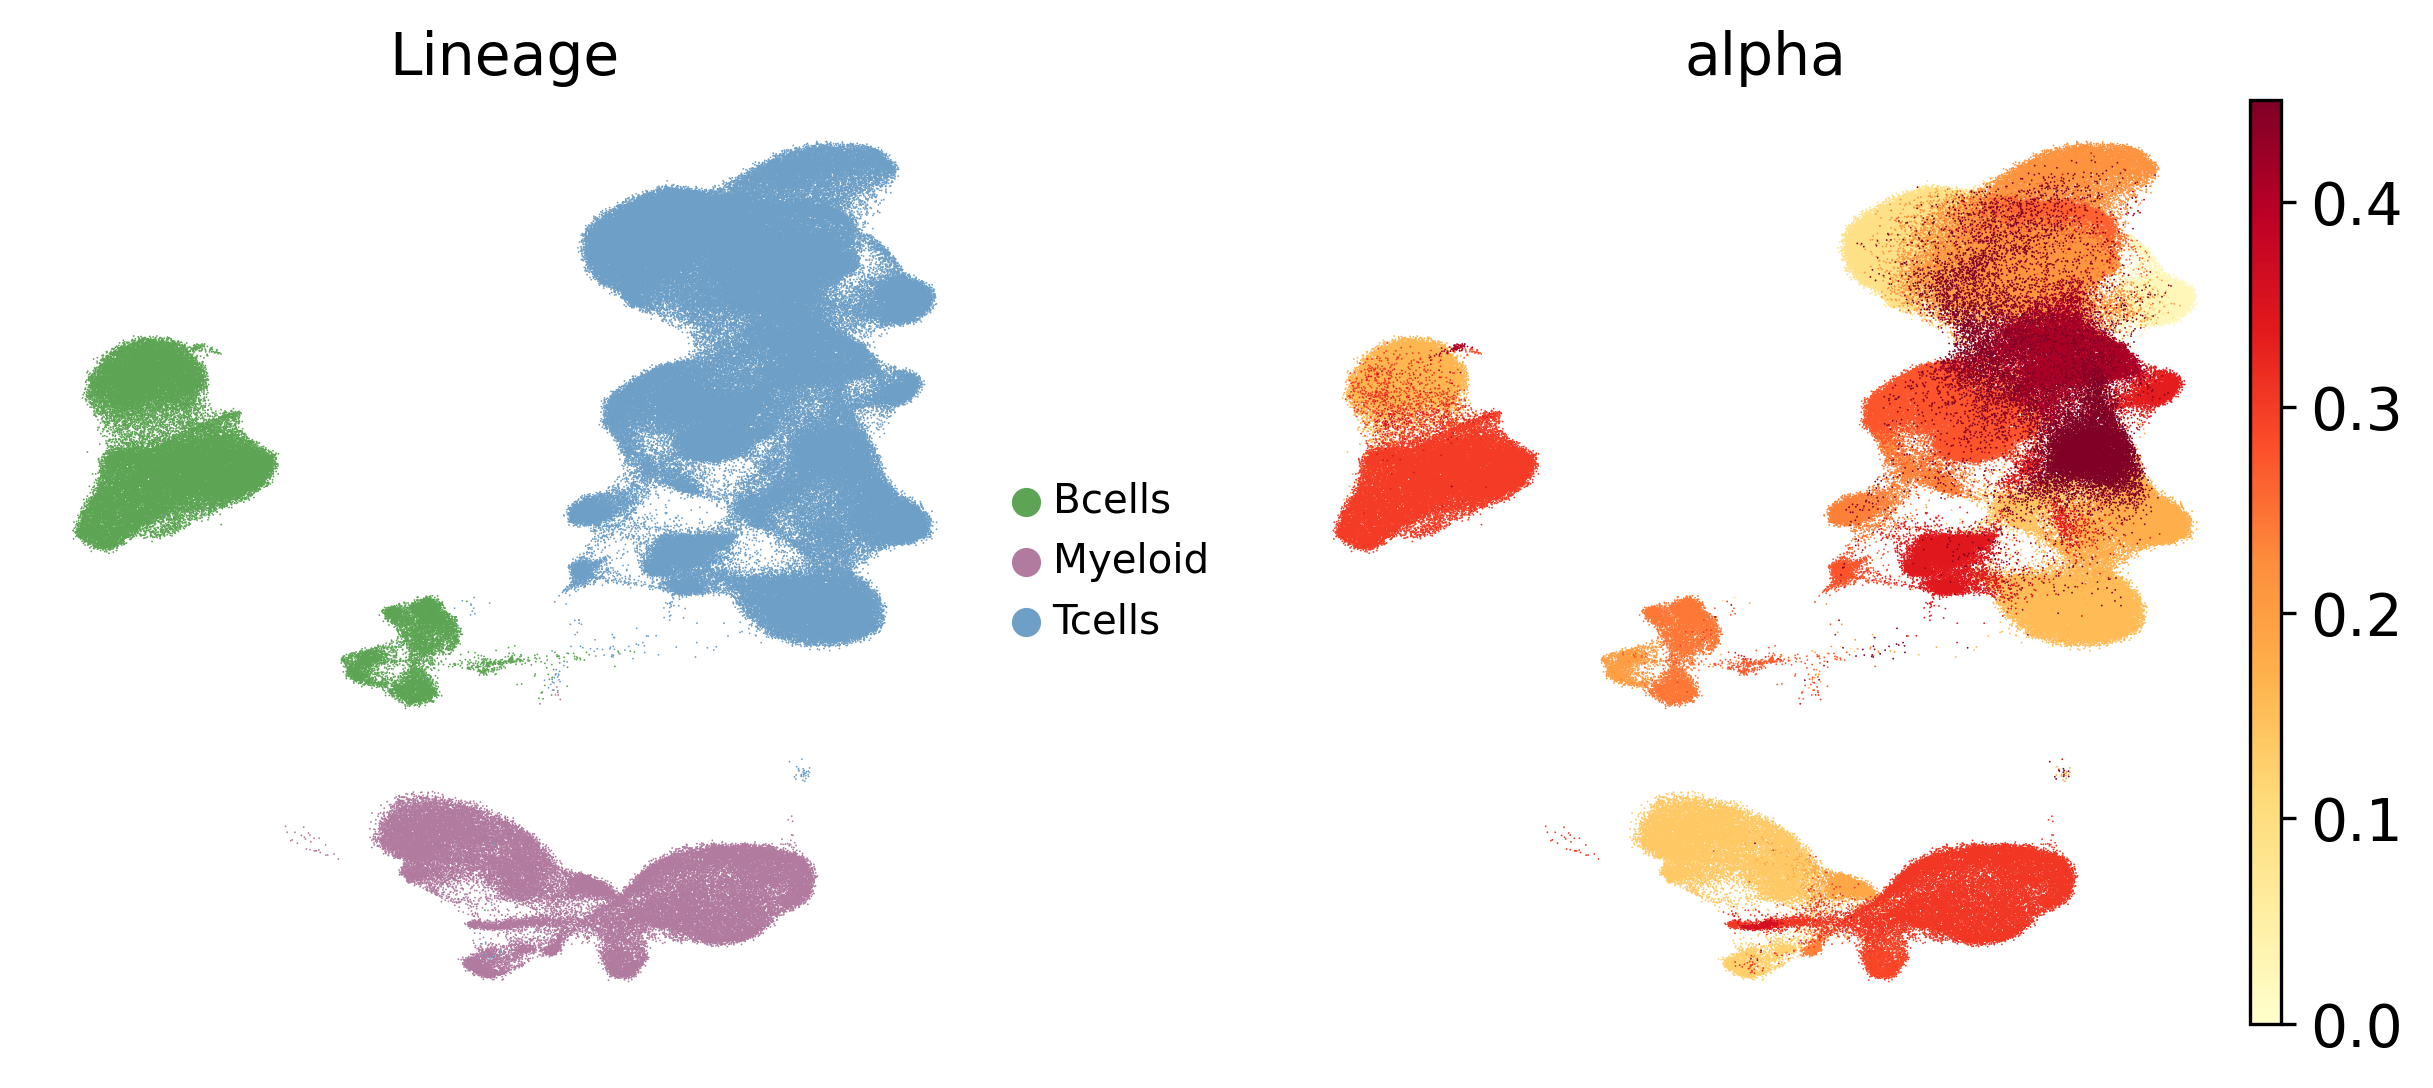

In [24]:
sc.pl.umap(adata, color=["Lineage_anno", "alpha"],save= "Adult_overview_corrected.svg",
           palette= {'Tcells' : "#6e9fc6","Bcells":"#5da554",  "Myeloid":"#b17ba0" },
           color_map=matplotlib.cm.YlOrRd, vmax = 0.45, vmin= 0,
           legend_loc = 'right margin',legend_fontoutline =1, 
           frameon= False, title= "Lineage", size = 0.75,
           legend_fontsize= 'x-small', na_in_legend = False )